In [2]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

## NumPy Avanzado

### 1 Procesamiento de visibilidades

In [3]:
# 1.1 Ejercicios Básicos
## 1 Procesamiento de visibilidades
def visilities(n=1_000_000, dtype=np.int32):
    amplitud = np.random.uniform(0, 1, n).astype(dtype)
    fase = np.random.uniform(0, 2 * np.pi, n).astype(dtype)
    visibilidades = amplitud * np.exp(1j * fase)
    return visibilidades


def prom_power(v):
    prom = []
    for value in v:
        real = value.real
        imag = value.imag
        p = math.sqrt(pow(real,2) + pow(imag,2))
        prom.append(p)

    sum = 0 
    for n in prom:
        sum += n
    prom = sum / len(v)
    return prom

def prom_power_vectorized(v):
    return np.mean(np.abs(v))

In [4]:
%%time
v = visilities()

CPU times: total: 62.5 ms
Wall time: 52.3 ms


In [5]:
%%time
prom = prom_power(v)

CPU times: total: 266 ms
Wall time: 272 ms


In [6]:
%%time
prom_np = prom_power_vectorized(v)

CPU times: total: 0 ns
Wall time: 2.98 ms


### 2 Optimizacion de memoria en Datos astronómicos

In [7]:
## 2 Optimizacion de memoria en Datos astronómicos
v_int32 = visilities(1000)
v_int64 = visilities(1000, dtype=np.int64)
v_float32 = visilities(1000, dtype=np.float32)
v_float64 = visilities(1000,dtype=np.float64)

print(f"Memoria I32: {v_int32.nbytes / 1e6} MB")
print(f"Memoria I64: {v_int64.nbytes / 1e6} MB")
print(f"Memoria F32: {v_float32.nbytes / 1e6} MB")
print(f"Memoria F64: {v_float64.nbytes / 1e6} MB")

Memoria I32: 0.016 MB
Memoria I64: 0.016 MB
Memoria F32: 0.008 MB
Memoria F64: 0.016 MB


In [8]:
%%time
test1 = v_int32 * np.random.randint(1, 10, dtype=np.int32)

CPU times: total: 0 ns
Wall time: 79.4 μs


In [9]:
%%time
test2 = v_int64 * np.random.randint(1, 10, dtype=np.int64)

CPU times: total: 0 ns
Wall time: 75.6 μs


In [10]:
%%time
test3 = v_float32 * np.float32(np.random.randint(1, 10))

CPU times: total: 0 ns
Wall time: 77.7 μs


In [11]:
%%time
test4 = v_float64 * np.float64(np.random.randint(1, 10))

CPU times: total: 0 ns
Wall time: 69.6 μs


### 3 Vistas vs Copias

In [12]:
array_original = np.array([1,2,3,4,5,6,7,8,9,10])

vista = array_original[1:5]
copia = array_original[1:5].copy()

vista[2] = 88
copia[2] = 89

print(f"Original {array_original}")
print(f"Vista {vista}")
print(f"Copia {copia}")

Original [ 1  2  3 88  5  6  7  8  9 10]
Vista [ 2  3 88  5]
Copia [ 2  3 89  5]


Al utilizar una vista, no se está creando un arreglo nuevo, solamante se está haciendo una ventana que apunta a directamente a la memoria del arreglo original. Por eso se modifican los valores del arreglo original. copy() si crea un arreglo completamente nuevo.

### 4 Análisis de Rendimiento


In [13]:
def norma_loop(x):
    suma = 0.0
    for i in x:
        suma += i * i
    return suma ** 0.5

def norma_numpy_vec(x):
    return np.sqrt(np.sum(x ** 2))

def norma_numpy_func(x):
    return np.linalg.norm(x)

def medir_tiempo(func, x, n_reps=5):
    tiempos = []
    for _ in range(n_reps):
        inicio = time.perf_counter()
        func(x)
        fin = time.perf_counter()
        tiempos.append(fin - inicio)
    return np.mean(tiempos)

sizes = [10**3, 10**5, 10**7]

resultados = []

for n in sizes:
    x = np.random.rand(n)
    t_loop = medir_tiempo(norma_loop, x)
    t_vec = medir_tiempo(norma_numpy_vec, x)
    t_func = medir_tiempo(norma_numpy_func, x)
    resultados.append((n, t_loop, t_vec, t_func))

# Mostrar tabla de resultados
print(f"{'Tamaño':>10} | {'Loop Python':>12} | {'Numpy Vec':>10} | {'np.linalg.norm':>15}")
print("-" * 55)
for n, t1, t2, t3 in resultados:
    print(f"{n:10d} | {t1:12.6f} | {t2:10.6f} | {t3:15.6f}")

    Tamaño |  Loop Python |  Numpy Vec |  np.linalg.norm
-------------------------------------------------------
      1000 |     0.000105 |   0.000010 |        0.000008
    100000 |     0.010962 |   0.000105 |        0.000107
  10000000 |     0.704026 |   0.017816 |        0.001534


### 5 Manipulacion de Arrays

In [14]:
matriz = np.random.rand(1000, 1000)

def maximo_por_fila(matriz):
  return np.max(matriz, axis=1)

maximos_filas = maximo_por_fila(matriz)

print("Máximo de las primeras 5 filas:", maximos_filas[:5])

def maximo_por_columna(matriz):
  return np.max(matriz, axis=0)

maximos_columnas = maximo_por_columna(matriz)

print("Máximo de las primeras 5 columnas:", maximos_columnas[:5])

def normalizar_filas(matriz):
                     
  media_filas = np.mean(matriz, axis=1, keepdims=True)
  std_filas = np.std(matriz, axis=1, keepdims=True)
  std_filas[std_filas == 0] = 1  
  matriz_normalizada = (matriz - media_filas) / std_filas

  return matriz_normalizada

matriz_norm = normalizar_filas(matriz)

print("Media de la primera fila normalizada:", np.mean(matriz_norm[0, :]))
print("Desviación estándar de la primera fila normalizada:", np.std(matriz_norm[1, :]))

# PYTHON

def max_fila_python(matriz):
    maximos = []
    for fila in matriz:
        maximos.append(max(fila))
    return maximos

def normalizar_filas_python(matriz):
    matriz_norm = []
    for fila in matriz:
        media = sum(fila) / len(fila)
        varianza = sum([(x - media) ** 2 for x in fila]) / len(fila)
        std = varianza ** 0.5
        if std == 0:
            std = 1
        fila_norm = [(x - media) / std for x in fila]
        matriz_norm.append(fila_norm)
    return matriz_norm

matriz = np.random.rand(1000, 1000)
matriz_lista = matriz.tolist()


print("\n")


inicio = time.time()
maximo_por_fila(matriz)
fin = time.time()
print(f"NumPy - Máximo por fila: {fin - inicio:.6f} segundos")

# Versión Python
inicio = time.time()
max_fila_python(matriz_lista)
fin = time.time()
print(f"Python puro - Máximo por fila: {fin - inicio:.6f} segundos")

print("-" * 30)
inicio = time.time()
normalizar_filas(matriz)
fin = time.time()
print(f"NumPy - Normalizar filas: {fin - inicio:.6f} segundos")

# Versión Python
inicio = time.time()
normalizar_filas_python(matriz_lista)
fin = time.time()
print(f"Python puro - Normalizar filas: {fin - inicio:.6f} segundos")

Máximo de las primeras 5 filas: [0.99712367 0.99748378 0.9981241  0.99839593 0.99978681]
Máximo de las primeras 5 columnas: [0.99950652 0.99911001 0.99760053 0.99664026 0.99983373]
Media de la primera fila normalizada: 1.092459456231154e-16
Desviación estándar de la primera fila normalizada: 0.9999999999999999


NumPy - Máximo por fila: 0.000280 segundos
Python puro - Máximo por fila: 0.005084 segundos
------------------------------
NumPy - Normalizar filas: 0.005858 segundos
Python puro - Normalizar filas: 0.091073 segundos


## Broadcasting

### 6 broadcasting basico


### 7 Broadcasting con Arrays 2D

### 8 None y np.newaxis

In [15]:
array1D = np.array(np.random.randint(1,10, size=6))

print(f"array: {array1D}\n")

matrix6x1 = array1D[:,None]
matrix1x6 = array1D[None, :]

print(f"6x1: {matrix6x1} \n shape: {matrix6x1.shape}")

print(f"1x6: {matrix1x6}\n shape: {matrix1x6.shape}\n")

print("suma:\n", matrix6x1 + matrix1x6)

print("mult:\n", matrix6x1 * matrix1x6)


array: [2 3 8 3 5 3]

6x1: [[2]
 [3]
 [8]
 [3]
 [5]
 [3]] 
 shape: (6, 1)
1x6: [[2 3 8 3 5 3]]
 shape: (1, 6)

suma:
 [[ 4  5 10  5  7  5]
 [ 5  6 11  6  8  6]
 [10 11 16 11 13 11]
 [ 5  6 11  6  8  6]
 [ 7  8 13  8 10  8]
 [ 5  6 11  6  8  6]]
mult:
 [[ 4  6 16  6 10  6]
 [ 6  9 24  9 15  9]
 [16 24 64 24 40 24]
 [ 6  9 24  9 15  9]
 [10 15 40 15 25 15]
 [ 6  9 24  9 15  9]]


Como los shapes de los arreglos no son iguales, numpy tiene que revisar las dimensiones de derecha a izquierda en este caso tenemos (6,1) y (1,6). Como el 1 y 6 no coinciden numpy estira el arreglo a la dimension mas grande, por tanto el resultado siempre es de 6x6. Para el caso del vector columna estira hacia la derecha agregando mas columnas con los mismos valores de cada fila, en el caso del vector fila es lo mismo.

### 9 Cálculo de Baselines del Interferómetro

### 10 Análisis de Correlación entre Antenas

In [16]:


N_ANTENNAS = 1000
N_OBSERVACIONES = 10

ruido = np.random.randn(N_ANTENNAS, N_OBSERVACIONES)

print(f"Ruido: {ruido.shape}")

# Covarianza broadcasting
# Cov(X, Y) = E[(X - E[X]) * (Y - E[Y])]
# O en forma matricial: (A_demeaned @ A_demeaned.T) / (N - 1)
media_antenas = ruido.mean(axis=1)
datos_demeaned = ruido - media_antenas[:, np.newaxis]
cov_broadcast = (datos_demeaned @ datos_demeaned.T) / (N_OBSERVACIONES - 1)

print(f"covarianza (Broadcasting): {cov_broadcast.shape}")

# covarianza np.cov
cov_np = np.cov(ruido)

print(f"covarianza (np.cov): {cov_np.shape}")
print("-" * 30)

equivalentes = np.allclose(cov_broadcast, cov_np)
print(f"¿Son las matrices equivalentes? {equivalentes}")
print("-" * 30)

Ruido: (1000, 10)
covarianza (Broadcasting): (1000, 1000)
covarianza (np.cov): (1000, 1000)
------------------------------
¿Son las matrices equivalentes? True
------------------------------


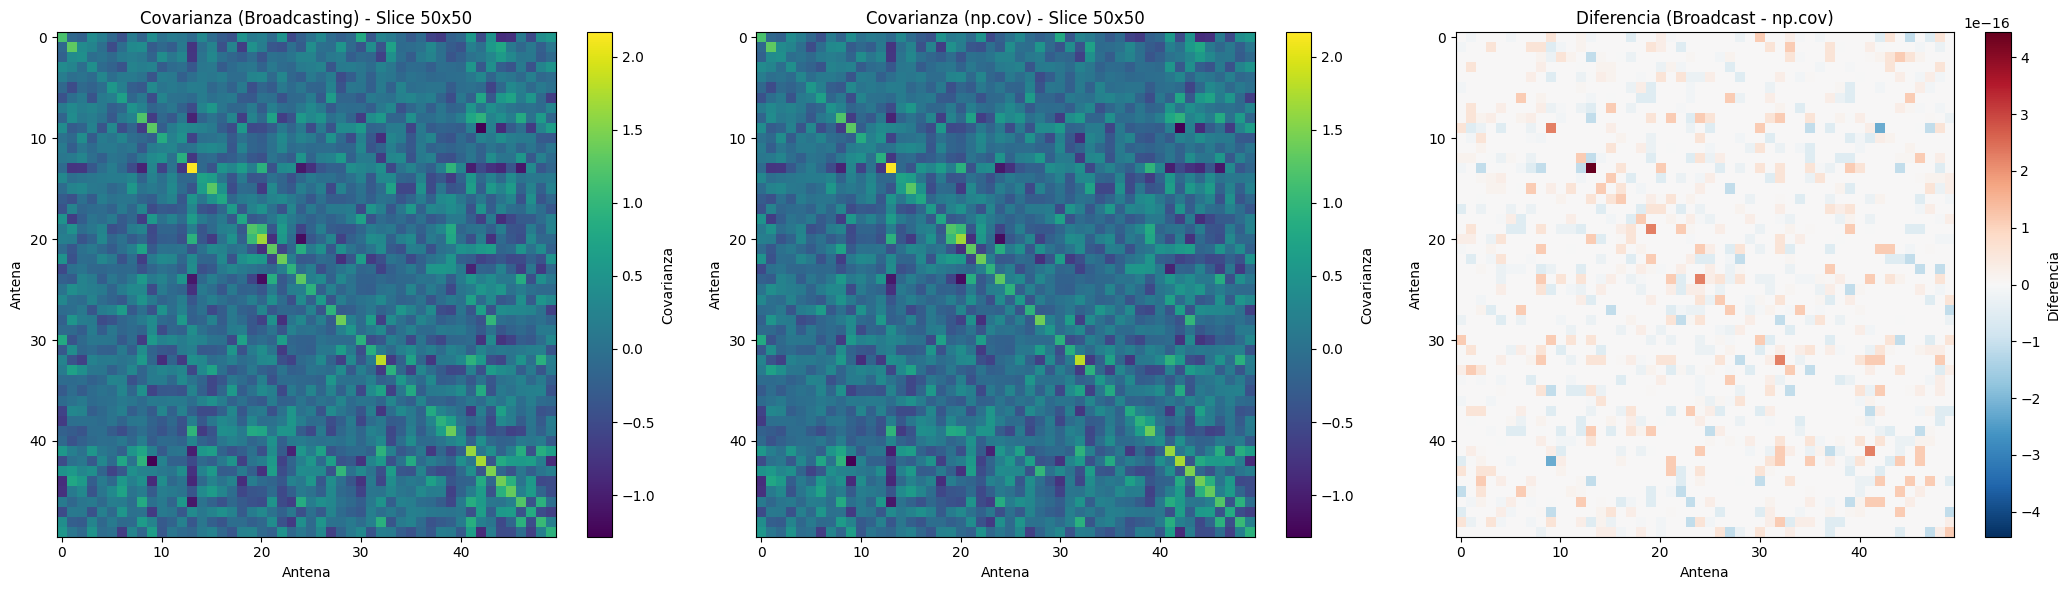

In [17]:
slice_size = 50

# Extraemos los slices
slice_broadcast = cov_broadcast[:slice_size, :slice_size]
slice_np = cov_np[:slice_size, :slice_size]

# Calculamos la diferencia
slice_diff = slice_broadcast - slice_np

# Determinamos un rango de color común para una comparación justa
vmin = min(slice_broadcast.min(), slice_np.min())
vmax = max(slice_broadcast.max(), slice_np.max())

# Creamos la figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# --- Gráfico 1: Covarianza con Broadcasting ---
im1 = axes[0].imshow(slice_broadcast, vmin=vmin, vmax=vmax, cmap='viridis', aspect='auto')
axes[0].set_title('Covarianza (Broadcasting) - Slice 50x50')
axes[0].set_xlabel('Antena')
axes[0].set_ylabel('Antena')
fig.colorbar(im1, ax=axes[0], label='Covarianza')

# --- Gráfico 2: Covarianza con np.cov() ---
im2 = axes[1].imshow(slice_np, vmin=vmin, vmax=vmax, cmap='viridis', aspect='auto')
axes[1].set_title('Covarianza (np.cov) - Slice 50x50')
axes[1].set_xlabel('Antena')
axes[1].set_ylabel('Antena')
fig.colorbar(im2, ax=axes[1], label='Covarianza')

# --- Gráfico 3: Diferencia ---
# Usamos un mapa de color divergente (Rojo-Azul)
vmax_diff = np.abs(slice_diff).max() # Rango de color simétrico
im3 = axes[2].imshow(slice_diff, cmap='RdBu_r', vmin=-vmax_diff, vmax=vmax_diff, aspect='auto')
axes[2].set_title('Diferencia (Broadcast - np.cov)')
axes[2].set_xlabel('Antena')
axes[2].set_ylabel('Antena')
fig.colorbar(im3, ax=axes[2], label='Diferencia')

plt.tight_layout()

# En tu script o notebook, usa plt.show() para mostrar la ventana
plt.show()

Los resultados son equivalentes. 

La diagonal principal nos indica que tan ruidosa es una antena en particular (Cov(i,i)). Fuera de la diagonal vemos que tanto se correlaciona el ruido entre diferentes antenas. (i,j) tal que i!=j

valores distintos de 0 fuera de la diagonal implica que el ruido esta correlacionado, por tanto las antenas estan captando una misma fuente de ruido, por ejemplo una RFI.


### 11 Correlación espacial de fuentes

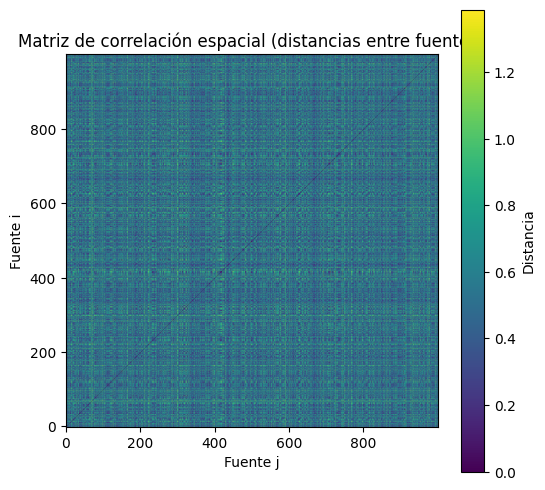

Tiempo broadcasting: 0.009 s
Tiempo loops: 0.536 s


In [18]:
# fuentes
N = 1000
np.random.seed(0)
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
pos = np.stack([x, y], axis=1)  # forma (N, 2)

# broadcasting
t0 = time.time()
dx = pos[:, 0][:, None] - pos[:, 0]  # (N, N)
dy = pos[:, 1][:, None] - pos[:, 1]
dist_matrix = np.sqrt(dx**2 + dy**2)
t_broadcast = time.time() - t0

# loops
t0 = time.time()
dist_loop = np.ndarray((N,N))
for i in range(N):
    for j in range(i+1, N):
        d = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
        dist_loop[i][j] = d
t_loop = time.time() - t0

plt.figure(figsize=(6, 6))
plt.imshow(dist_matrix, cmap='viridis', origin='lower')
plt.colorbar(label='Distancia')
plt.title('Matriz de correlación espacial (distancias entre fuentes)')
plt.xlabel('Fuente j')
plt.ylabel('Fuente i')
plt.show()

print(f"Tiempo broadcasting: {t_broadcast:.3f} s")
print(f"Tiempo loops: {t_loop:.3f} s")

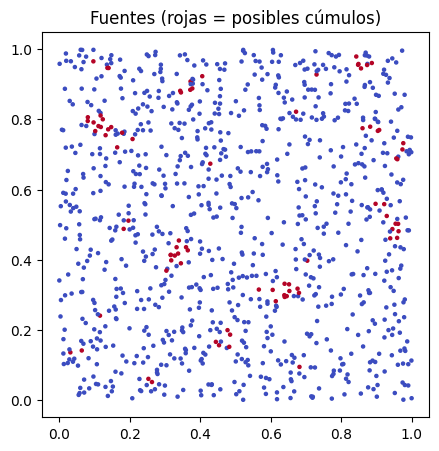

In [19]:
# cumulos
from scipy.spatial import cKDTree

tree = cKDTree(pos)
counts = [len(tree.query_ball_point(p, r=0.05)) for p in pos]
clusters = np.array(counts) > np.percentile(counts, 90)

plt.figure(figsize=(5,5))
plt.scatter(x, y, s=5, c=clusters, cmap='coolwarm')
plt.title('Fuentes (rojas = posibles cúmulos)')
plt.show()

## Dask

### 12 Configuracion de Dask

In [ ]:
import dask.array as da
import time
from dask.distributed import Client, LocalCluster
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

cluster = LocalCluster(n_workers=4, threads_per_worker=1, processes=True)
client = Client(cluster)
print(f"Cliente Dask listo. Dashboard disponible en: {client.dashboard_link}")

shape = (10000, 10000)
chunks = (1000, 1000)

print(f"\nCreando array Dask de forma {shape} con chunks {chunks}...")
dask_array = da.random.random(size=shape, chunks=chunks)
print(dask_array)

# SUMA
start_lazy_sum = time.time()
result_sum_lazy = dask_array.sum()
end_lazy_sum = time.time()
print(f"Tiempo de DEFINICIÓN (suma): {end_lazy_sum - start_lazy_sum:.6f} segundos")

# MULTIPLICACION
start_lazy_mul = time.time()
result_mul_mean_lazy = (dask_array * 2).mean()
end_lazy_mul = time.time()
print(f"Tiempo de DEFINICIÓN (multiplicación + media): {end_lazy_mul - start_lazy_mul:.6f} segundos")


print("SUMA.")
start_compute_sum = time.time()
total_sum = result_sum_lazy.compute()
end_compute_sum = time.time()

print(f"  Resultado (Suma): {total_sum:.2f}")
print(f"  Tiempo (Suma): {end_compute_sum - start_compute_sum:.4f} segundos")

print("\nMULTIPLICACION")
start_compute_mul = time.time()
mean_of_mul = result_mul_mean_lazy.compute()
end_compute_mul = time.time()

print(f"  Resultado (Multiplicación + Media): {mean_of_mul:.4f}")
print(f"  Tiempo (Multiplicación + Media): {end_compute_mul - start_compute_mul:.4f} segundos")


Cliente Dask listo. Dashboard disponible en: http://127.0.0.1:8787/status

Creando array Dask de forma (10000, 10000) con chunks (1000, 1000)...
dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Tiempo de DEFINICIÓN (suma): 0.001117 segundos
Tiempo de DEFINICIÓN (multiplicación + media): 0.001273 segundos
SUMA.
  Resultado (Suma): 50001136.28
  Tiempo (Suma): 0.7734 segundos

MULTIPLICACION
  Resultado (Multiplicación + Media): 1.0000
  Tiempo (Multiplicación + Media): 0.5486 segundos


In [41]:
client.close()
cluster.close()


### 13 Lazy evaluation

In [38]:
warnings.filterwarnings("ignore", category=FutureWarning)

cluster = LocalCluster(n_workers=4, threads_per_worker=1, processes=True)
client = Client(cluster)
print(f"Cliente Dask listo. Dashboard: {client.dashboard_link}")

# Array
shape = (3000, 3000)
chunks = (1000, 1000)

print(f"\nCreando array Dask 'x' de forma {shape} con chunks {chunks}...")
x = da.random.random(size=shape, chunks=chunks)
print(x)

# Cadena de Operaciones 

# Operación 1: Multiplicar por 2
y = x * 2
# Operación 2: Sumar la transpuesta
z = y + y.T
# Operación 3: Calcular la media de toda la matriz
result_lazy = z.mean()

# Grafo
grafo = result_lazy.visualize(filename='grafo.png', format='png')

c:\Users\vicen\AppData\Local\Programs\Python\Python313\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50632 instead
  warnings.warn(


Cliente Dask listo. Dashboard: http://127.0.0.1:50632/status

Creando array Dask 'x' de forma (3000, 3000) con chunks (1000, 1000)...
dask.array<random_sample, shape=(3000, 3000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>


In [39]:
%%time
final_result = result_lazy.compute()


CPU times: total: 31.2 ms
Wall time: 419 ms


In [40]:
# --- Cierre ---
print("\nCerrando cliente Dask.")
client.close()
cluster.close()


Cerrando cliente Dask.


### 14 compute vs persist

In [47]:
warnings.filterwarnings("ignore", category=FutureWarning)
print("Configurando cliente Dask...")
try:
    # Usamos más memoria por worker, ya que persist() guarda datos en RAM
    cluster = LocalCluster(n_workers=4, 
                           threads_per_worker=1, 
                           memory_limit='2GB')
    client = Client(cluster)
    print(f"Cliente Dask listo. Dashboard: {client.dashboard_link}")
except Exception as e:
    print(f"Error al iniciar Dask: {e}")
    exit()

Configurando cliente Dask...


c:\Users\vicen\AppData\Local\Programs\Python\Python313\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50921 instead
  warnings.warn(


Cliente Dask listo. Dashboard: http://127.0.0.1:50921/status


In [48]:
shape = (15000, 15000)
chunks = (3000, 3000)
x = da.random.random(size=shape, chunks=chunks)

intermediate_op = (x * 2) + (x.T / 3) - x.mean(axis=0)

In [51]:
# caso persit
total_start_B = time.time()
print("  Calculando y 'persistiendo' datos intermedios...")
start_persist = time.time()
persisted_array = intermediate_op.persist()
end_persist = time.time()
print(f"    Tiempo (Persist): {end_persist - start_persist:.4f} segundos")
print(f"    Objeto 'persisted_array': {persisted_array}")
print("    (Los datos intermedios están AHORA en la RAM de los workers)")

# Operaciones 
# Calcular la media
print("\n  Calculando media (desde datos persistidos)...")
start_B1 = time.time()
mean_B = persisted_array.mean().compute()
end_B1 = time.time()
print(f"    Tiempo (Media): {end_B1 - start_B1:.4f} segundos")
print(f"    Resultado (Media): {mean_B:.4f}")

# Calcular la desviación estándar
print("\n  Calculando std (desde datos persistidos)...")
start_B2 = time.time()
std_B = persisted_array.std().compute()
end_B2 = time.time()
print(f"    Tiempo (Std): {end_B2 - start_B2:.4f} segundos")
print(f"    Resultado (Std): {std_B:.4f}")

total_end_B = time.time()
print(f"\n  TIEMPO TOTAL: {total_end_B - total_start_B:.4f} segundos")

  Calculando y 'persistiendo' datos intermedios...
    Tiempo (Persist): 0.0076 segundos
    Objeto 'persisted_array': dask.array<sub, shape=(15000, 15000), dtype=float64, chunksize=(3000, 3000), chunktype=numpy.ndarray>
    (Los datos intermedios están AHORA en la RAM de los workers)

  Calculando media (desde datos persistidos)...
    Tiempo (Media): 0.1748 segundos
    Resultado (Media): 0.6667

  Calculando std (desde datos persistidos)...
    Tiempo (Std): 0.5541 segundos
    Resultado (Std): 0.5853

  TIEMPO TOTAL: 0.7372 segundos


In [53]:
# caso compute
total_start_A = time.time()

# Operaciones
# Calcular la media
print("  Calculando media (con .compute())...")
start_A1 = time.time()
mean_A = intermediate_op.mean().compute()
end_A1 = time.time()
print(f"    Tiempo (Media): {end_A1 - start_A1:.4f} segundos")
print(f"    Resultado (Media): {mean_A:.4f}")

# Calcular la desviación estándar
print("\n  Calculando std (con .compute())...")
start_A2 = time.time()
std_A = intermediate_op.std().compute()
end_A2 = time.time()
print(f"    Tiempo (Std): {end_A2 - start_A2:.4f} segundos")
print(f"    Resultado (Std): {std_A:.4f}")

total_end_A = time.time()
print(f"\n  TIEMPO TOTAL : {total_end_A - total_start_A:.4f} segundos")

  Calculando media (con .compute())...
    Tiempo (Media): 1.3303 segundos
    Resultado (Media): 0.6667

  Calculando std (con .compute())...
    Tiempo (Std): 1.7813 segundos
    Resultado (Std): 0.5853

  TIEMPO TOTAL : 3.1120 segundos


### 15 procesamiento de datos ALMA

### 16 Analisis de Espectros de Radio

## Numba

### 17 Decorador @jit

### 18 Decorador @njit

### 19 Decorador @vectorize

### 20 prange para Paralelizacion

### 21 Simulacion de Ruido Atmosferico